## MDEO model: DM scan without kinetic mixing $\epsilon$

The idea is to do a firts DM random scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

In [3]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#For good plots
plt.rcParams.update({'font.size': 12}) 
#plt.rc('font',size='18')

In [4]:
#run: random_general_scan-noKMv4.py
#random_general_scan-noKM-XXZpS.py
#File for XX->ZpZp
xd = pd.read_csv('noKM-xd_scan-noKM-XXZpS-01.csv')

xd.shape

(50, 87)

In [5]:
xd[['MZp','mChi','mXi_1','mXi_2','vX','mh2','g1p','Yc','Omega1','Omega2']][:3]

,MZp,mChi,mXi_1,mXi_2,vX,mh2,g1p,Yc,Omega1,Omega2
0,27.719678,120.208153,700.0,900.0,200.0,3120.208153,0.015400,0.85,0.215,1.940000e-25
1,11.219774,120.208153,700.0,900.0,200.0,3120.208153,0.006233,0.85,0.223,2.860000e-25
2,90.576105,120.208153,700.0,900.0,200.0,3120.208153,0.050320,0.85,0.090,7.990000e-10


Text(0, 0.5, '$\\Omega_1 h^2$')

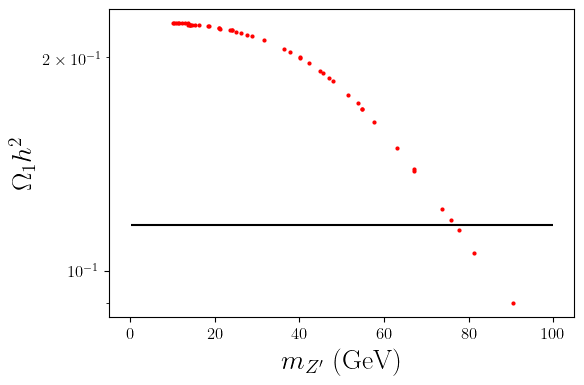

In [6]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, xd.Omega1,color='red', marker='o',ms=2,linestyle='')

plt.hlines(0.116,0.1,1e2, 'k',label=r'0.12')

plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)',size=20)
plt.ylabel(r'$\Omega_1 h^2$',size=20)

#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
#plt.legend(prop={'size':16},loc='best')

#plt.ylim(0.115,0.146)
#plt.xlim(xd.MZp.min(), 82)
#plt.tight_layout()

#plt.savefig('plots/benchmark4.pdf')
#plt.show()

In [7]:
del[xd['Unnamed: 0']]

In [8]:
xd[['Omega1','Omega2']][:3]

,Omega1,Omega2
0,0.215,1.940000e-25
1,0.223,2.860000e-25
2,0.090,7.990000e-10


Filter with $m {\chi_1^0} < m {s_1}$ and $\lambda_5 <= \sqrt(4\pi)$

In [9]:
#xd = xd[np.logical_and(np.abs(xd.mXi_1) < np.abs(xd.mns_1), xd.Lam5 < np.sqrt(4*np.pi) )]
#xd = xd[np.logical_and(np.abs(xd.mXi_1) < np.abs(xd.mns_1), 0<1 )]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(50, 86)

## Dark matter $\Omega h^2$

In [10]:
#Experimental values for DM:Planck results 2018
e = 3
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.11639999999999999 0.12 0.1236


In [11]:
xd = xd[np.logical_and(xd.MZp < xd.mChi, 1>0)]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(50, 86)

In [15]:
xd

,Lam1,Lam2,Lam3,Lam4,Lam5,Lam6,Lam7,Lam8,Lam9,Lam10,...,Xxe3E3,Xxu3U3,XxZpZp,Xxh2Zp,Xxxc,XxWW,sv1122,sv1100,sv2211,sv2200
0,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,5.910000e-68,0.0,1.940000e-48,0.0,2.410000e-47,0.0,5.432400e-102,0.67511,16.879,1.517100e+24
1,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,7.170000e-65,0.0,5.400000e-48,0.0,4.090000e-46,0.0,5.432300e-102,0.66005,16.879,1.029400e+24
2,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,3.360000e-25,0.0,6.780000e-17,0.0,8.020000e-17,0.0,5.441800e-102,1.32410,16.909,1.952900e+08
3,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,1.790000e-52,0.0,6.170000e-44,0.0,2.960000e-42,0.0,5.432300e-102,0.66133,16.879,8.717400e+21
4,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,3.220000e-79,0.0,4.820000e-59,0.0,3.500000e-58,0.0,5.432500e-102,0.69448,16.880,3.352400e+29
5,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,1.280000e-54,0.0,2.090000e-38,0.0,4.550000e-37,0.0,5.432300e-102,0.66632,16.879,1.323600e+19
6,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,3.990000e-64,0.0,7.080000e-49,0.0,6.710000e-47,0.0,5.432300e-102,0.65962,16.879,2.870700e+24
7,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,5.720000e-55,0.0,9.610000e-42,0.0,4.870000e-40,0.0,5.432300e-102,0.66114,16.879,6.866200e+20
8,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,4.570000e-28,0.0,3.820000e-23,0.0,5.340000e-22,0.0,5.432300e-102,0.67261,16.879,2.136300e+11
9,0.258148,0.0,0.0,0.0,243.39247,0.0,0.0,0.0,0.0,0.0,...,5.030000e-64,0.0,4.950000e-48,0.0,1.640000e-47,0.0,5.433400e-102,0.78134,16.883,8.824700e+23


for $M_1=86$

In [12]:
from scipy import interpolate
from scipy.signal import savgol_filter

fitOmega=interpolate.interp1d(xd.MZp, xd.Omega1)

In [13]:
print(xd.g1p.min(),xd.g1p.max())

0.0055665296811116 0.0503200582280911


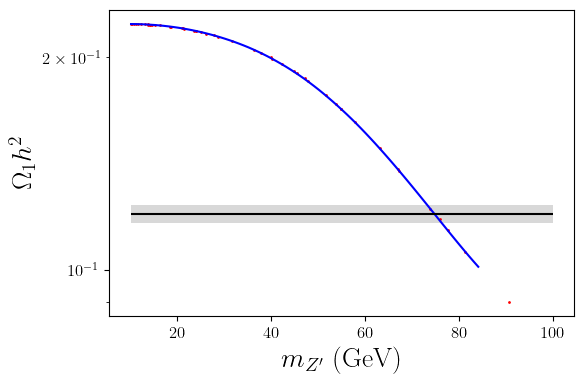

In [23]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, (xd.Omega1+xd.Omega2),color='red', marker='.',ms=2,linestyle='')

n=np.arange(10.1,85.013,1)
m=fitOmega(n)
yhat = savgol_filter(m, 51, 3)

plt.plot(n,yhat,'b-')

n=np.linspace(1e1,1.0e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.3,label=r'$\Omega h^2$ to $3\sigma$')

plt.hlines(Omega,10,100, 'k',label=r'0.12')

plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)',size=20)
plt.ylabel(r'$\Omega_1 h^2$',size=20)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
#plt.legend(prop={'size':16},loc='best')

#plt.ylim(0.115,0.146)
#plt.xlim(xd.MZp.min(), 82)
plt.tight_layout()

#plt.savefig('plots/benchmark4.pdf')
#plt.show()

In [24]:
xd[['MZp','mChi','mXi_1','mXi_2','vX','mh2','g1p','Yc','Omega1','Omega2']][:3]

,MZp,mChi,mXi_1,mXi_2,vX,mh2,g1p,Yc,Omega1,Omega2
0,27.719678,120.208153,700.0,900.0,200.0,3120.208153,0.015400,0.85,0.215,1.940000e-25
1,11.219774,120.208153,700.0,900.0,200.0,3120.208153,0.006233,0.85,0.223,2.860000e-25
2,90.576105,120.208153,700.0,900.0,200.0,3120.208153,0.050320,0.85,0.090,7.990000e-10


Analitycal behavoiur

In [25]:
import numpy as np
import pandas as pd
from scipy.special import zeta
from scipy.optimize import bisect
from scipy import integrate as intg
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
USETEX=False
if USETEX:
    matplotlib.rcParams['text.usetex'] = True
    #matplotlib.rcParams['text.latex.unicode'] = True

In [26]:
Tdec_νL = 0.0023
T, g = np.loadtxt('GT.dat',usecols=(0,1),unpack=True); T*=1e-3
geff = InterpolatedUnivariateSpline(T, g)
g_eff = lambda T: geff(T)

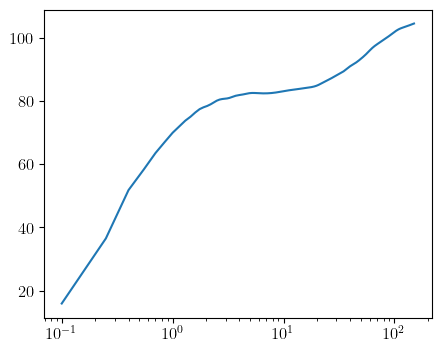

In [27]:
plt.figure(figsize=(5,4))

n=np.linspace(1e-1,1.5e2,1000)

plt.semilogx(n,g_eff(n))

In [28]:
gd = pd.read_csv('gT.csv')

In [29]:
#NEW
def relic_abundance(a, b, xf, m):
    MPl=1.22E19
    xd2=gd[gd['T']>m/xf].copy()
    T=np.asarray(xd2['T'])
    g=np.asarray(xd2['g'])
    geff=g*T
    thavgeff=geff.sum()/T.sum()    
    sqrtg=np.sqrt(thavgeff)
    
    return 2*1.04E9*xf/(MPl*sqrtg*(a + 3.0*b/xf))

In [30]:
def relic_abundance(a, b, xf, m):
    MPl=1.22E19
    sqrtg=np.sqrt(g_eff(m/xf))
    
    return 2.08E9*xf/(MPl*sqrtg*(a + 3.0*b/xf))

In [31]:
M1 = xd['mChi'][0]
xd['r'] = xd['MZp']/xd['mChi']

In [32]:
print(xd.r.min(),xd.r.max())

0.08335335992167622 0.753493857941333


RELIC DENSITY:

\begin{equation}
\label{eq:RelicAbundance}
\Omega_{\chi} h^{2} \approx \frac{2.08 \times 10^{9}\, x_{f}\,\,\text{GeV}^{-1}}{M_{\mathrm{Pl}} \sqrt{g_{*}(T_f)}\left(a+3 b / x_{f}\right)}\,,
\end{equation}

FeynCalc:

\begin{equation}
\langle\sigma{v}\rangle\approx a+bv^2
\end{equation}

FeynCalcl lat version:

\begin{equation}
a=-\frac{\text{g}^4_D \sqrt{1-r^2} \left(1519 r^4-1357 r^2-162\right)}{16 \pi  \text{Mx}^2 r^2 \left(r^2-2\right)^2}
\end{equation}


\begin{equation}
b= -\frac{27 \text{gBL}^4 \sqrt{1-r^2} \left(\text{Ms}^4 \left(245 r^2-162\right)+16 \text{Ms}^2 \text{Mx}^2 \left(162-325 r^2\right)+16
   \text{Mx}^4 \left(1784 r^2-729\right)\right)}{8 \pi  r^4 \left(r^2-2\right)^4 \left(\text{Ms}^2 \text{Mx}-4 \text{Mx}^3\right)^2}
\end{equation}

\begin{equation}
b= \frac{\text{gBL}^4 \sqrt{1-r^2} \left(\text{Ms}^4 \left(48379 r^6+25638 r^4-79380 r^2+52488\right)+4 \text{Ms}^2 \text{Mx}^2 \left(85897
   r^6-352434 r^4+421200 r^2-209952\right)-16 \text{Mx}^4 \left(409838 r^6-661407 r^4+578016 r^2-236196\right)\right)}{96 \pi  r^4
   \left(r^2-2\right)^4 \left(\text{Ms}^2 \text{Mx}-4 \text{Mx}^3\right)^2}
   \end{equation}
   

\begin{equation}
b=\frac{\text{gBL}^4 \left(-\frac{21261 \text{Ms}^4}{4}-9318 \text{Ms}^2 \text{Mx}^2+\frac{13122 \text{Ms}^4-209952 \text{Ms}^2 \text{Mx}^2+944784 \text{Mx}^4}{r^4}+r^2 \left(6724 \text{Ms}^4-60434 \text{Ms}^2 \text{Mx}^2+35737
   \text{Mx}^4\right)+\frac{-162 \text{Ms}^4+106272 \text{Ms}^2 \text{Mx}^2-894888 \text{Mx}^4}{r^2}+476610 \text{Mx}^4\right)}{384 \pi  \left(\text{Ms}^2 \text{Mx}-4 \text{Mx}^3\right)^2}   
 \end{equation}   

with $r=\frac{m_{Z'}}{M_1}$.

https://inspirehep.net/files/3fb25aaba1b2df77e1e8718195cc1f20
\begin{equation}
\langle\sigma{v}\rangle
\approx\frac{\,g^4_D (1-r^2)^{3/2}(1-r^2/2)^{-2}}{16\pi M_1^2}
\end{equation}



In [33]:
#Seclude WIMP DM work: ONly Vector interation
#https://arxiv.org/pdf/0711.4866.pdf
def a_coefficient_Sec(g1p, r, M1): 
    alpha= g1p**2/(4.*np.pi)
    k = np.pi*(alpha)**2/(M1)**2*np.sqrt(1. - r**2)   
    return k

#https://inspirehep.net/files/3fb25aaba1b2df77e1e8718195cc1f20
#https://arxiv.org/pdf/2203.12034.pdf
#Ernest Ma: vector interation
def a_coefficient_Ma(g1p, r, Mx): 
    k = g1p**4/(16*np.pi*Mx**2)*(1. - r**2)**(1.5)*(1. - r**2/2.)**(-2)     
    return k

#XX to nunu
def a_coefficient_vv(g1p, r, Mx): 
    n = 81.*g1p**4
    d = 16.*np.pi*Mx**2*(r**2-4.)**2
    k = n/d
    return k

#XX to nunu
def b_coefficient_vv(g1p, r, Mx): 
    n = 27.*g1p**4*(41.*r**2-158.)
    d = 16.*np.pi*Mx**2*(r**2-4.)**3
    k = n/d
    return k

#FeynCalc
def a_coefficient_Fey(g1p, r, Mx): 
    k = -g1p**4*np.sqrt(1.-r**2)*(1519*r**4-1357*r**2-162)/(16.*np.pi*Mx**2*r**2*(r**2-2.)**2)  
    return k

#FeynCalc: 4 version
def b_coefficient_Fey(g1p, r, Mx,Ms): 
    
    c0 = -21261*Ms**4/4 -9318*Ms**2*Mx**2 +476610*Mx**4
    cm4 = (13122*Ms**4-209952*Ms**2*Mx**2+944784*Mx**4)/r**4 
    cm2 = (-162*Ms**4+106272*Ms**2*Mx**2-894888*Mx**4)/r**2
    c2 = (6724*Ms**4-60434*Ms**2*Mx**2+35737*Mx**4)*r**2
    
    n = g1p**4*(cm4+cm2+c0+c2 )
    
    d = 384.*np.pi*(Ms**2*Mx-4.*Mx**3)**2
    k = n/d 
    return k

#Nicole F.: 1610.03063
def a_coefficient_ZZ(g1p, MZp, Mx, QA, QV): 
    
    nZ = (MZp/Mx)**2
    n = g1p**4*(1.-nZ)**(3/2)*(2.*QA**2*QV**2*(4.-3.*nZ)+QA**4*nZ+QV**4*nZ)
    d = 4.*np.pi*Mx**2*(nZ-2.)**2*nZ
    k = n/d
    return k

def a_coefficient_sZ(g1p, MZp, Mx, Ms, QA, QV, yx): 
    
    ns = (Ms/Mx)**2
    nZ = (MZp/Mx)**2
    QS = 1/2

    k1 = g1p**2*np.sqrt((ns-nZ-4.)**2-16.*nZ)/(256.*np.pi*Mx**2*(nZ-4.)**2*nZ**2*(ns+nZ-4.)**2)

    k2 = g1p**2*QS**2*(ns+nZ-4)**2*(QA**1*(nZ-4)**2*((ns-nZ-4)**2-16*nZ)+QV**2*nZ**2*((ns-nZ-4)**2+32*nZ))

    k3 = 24*np.sqrt(2.)*g1p*QS*QV**2*yx*(nZ-4.)*nZ**(5/2)*(ns**2-8*ns-nZ**2+16)+4*QV**2*yx**2*(nZ-4)**2*nZ**2*((ns-nZ-4)**2+8*nZ)

    k =k1*(k2+k3)

    return k

In [34]:
print(a_coefficient_ZZ(0.1, 0.5, 100,1/2,1/2),a_coefficient_vv(0.1, 0.5, 100),b_coefficient_vv(0.1, 0.5, 100))
print('a_coefficient_ZZ=',a_coefficient_ZZ(0.01,50,86.1,1/2,9/2))
print('a_coefficient_sZ=',a_coefficient_sZ(0.01,50,86.1,50.,1/2,9/2,0.5))

3.978774105147102e-06 1.1459155902616466e-09 1.5049691418769628e-08
a_coefficient_ZZ= 1.0471177882768053e-11
a_coefficient_sZ= 1.8522127744378036e-09


In [35]:
print('a =',a_coefficient_Fey(0.1,0.5,10),'b =',b_coefficient_Fey(0.1,0.5,10,200.01))
print('a =',a_coefficient_Fey(0.1,0.5,100),'b =',b_coefficient_Fey(0.1,0.5,100,200.01))

a = 9.143339666165998e-06 b = 0.00016775600142894927
a = 9.143339666165997e-08 b = 180.2031360850741


In [36]:
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtocmmin1 = 5.06*1e+13
GeVtosegmin1 = 1.52*1e+24
tocm3sm1 = GeVtosegmin1/(GeVtocmmin1)**3

print(GeVtocmmin1,GeVtosegmin1, GeVtosegmin1/(GeVtocmmin1)**3)

50599999999999.99 1.52e+24 1.1732539834905879e-17


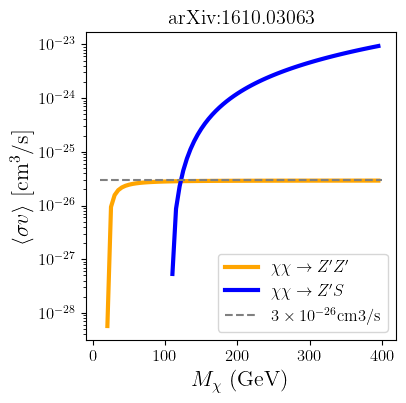

In [32]:
plt.figure(figsize=(4,4))

DM = np.arange(20.1,400,5)
DM2 = np.arange(110.1,400,5)

plt.semilogy(DM, a_coefficient_ZZ(g1p=0.1, MZp=20., Mx=DM, QA=1/2, QV=1/2)*tocm3sm1,\
             color='orange', lw=3,label=r'$\chi\chi\to Z^{\prime}Z^{\prime}$')

plt.semilogy(DM2, a_coefficient_sZ(g1p=0.1, MZp=20, Mx=DM2, Ms=200, QA=1/2, QV=1/2, yx=0.5)*tocm3sm1,\
             color='blue', lw=3,label=r'$\chi\chi\to Z^{\prime}S$')

plt.hlines(3*1.e-26,10,400,color='grey',linestyle='--',label=r'$3\times 10^{-26}$cm3/s')


plt.xlabel(r'$M_{\chi}$ (GeV)',size=16)
plt.ylabel(r'$\langle\sigma v\rangle$ [cm$^3/$s]',size=16)
plt.legend(loc='lower right')
plt.title('arXiv:1610.03063')
#plt.grid()

#plt.ylim(1e-29,1e-22)
#plt.xlim(0, 400)

plt.show()

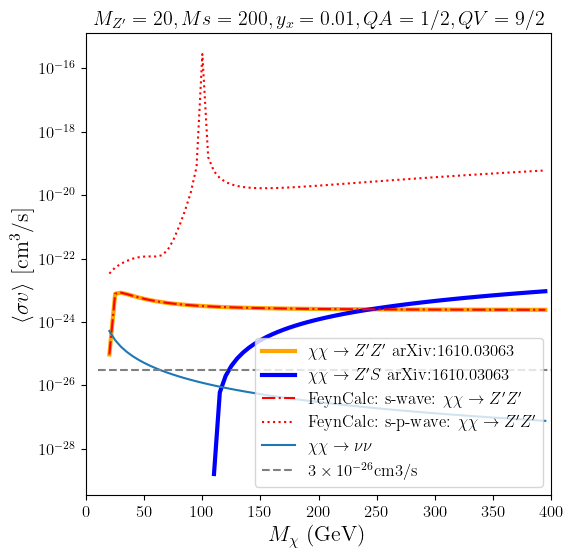

In [28]:
plt.figure(figsize=(6,6))

DM = np.arange(20.1,400,5)
DM2 = np.arange(110.1,400,5)

plt.semilogy(DM, a_coefficient_ZZ(g1p=0.1, MZp=20., Mx=DM, QA=1/2, QV=9/2)*tocm3sm1,\
             color='orange', lw=3,label=r'$\chi\chi\to Z^{\prime}Z^{\prime}$ arXiv:1610.03063')

plt.semilogy(DM2, a_coefficient_sZ(g1p=0.1, MZp=20, Mx=DM2, Ms=200, QA=1/2, QV=9/2, yx=0.01)*tocm3sm1,\
             color='blue', lw=3,label=r'$\chi\chi\to Z^{\prime}S$ arXiv:1610.03063')

plt.semilogy(DM,(a_coefficient_Fey(g1p=0.1, r=(20./DM), Mx=DM)+0*b_coefficient_Fey(g1p=0.1,\
                r=(20./DM), Mx=DM, Ms=200))*tocm3sm1,'r-.',\
             label=r'FeynCalc: s-wave: $\chi\chi \to Z^{\prime}Z^{\prime}$')

plt.semilogy(DM,(a_coefficient_Fey(g1p=0.1, r=(20./DM), Mx=DM)+1*b_coefficient_Fey(g1p=0.1,\
                r=(20./DM), Mx=DM, Ms=200))*tocm3sm1,'r:',\
             label=r'FeynCalc: s-p-wave: $\chi\chi \to Z^{\prime}Z^{\prime}$')

plt.semilogy(DM, a_coefficient_vv(g1p=0.1, r=(20./DM), Mx=DM)*tocm3sm1,\
             label=r'$\chi\chi \to \nu\nu$')

plt.hlines(3*1.e-26,10,400,color='grey',linestyle='--',label=r'$3\times 10^{-26}$cm3/s')

plt.xlabel(r'$M_{\chi}$ (GeV)',size=16)
plt.ylabel(r'$\langle\sigma v\rangle$ [cm$^3/$s]',size=16)
plt.legend(loc='lower right')
plt.title(r'$M_{Z^{\prime}}=20, Ms=200, y_x=0.01, QA=1/2, QV=9/2$')
#plt.grid()

#plt.ylim(1e-29,1e-22)
plt.xlim(0, 400)

plt.show()

In [37]:
xd.mh2

0     3120.208153
1     3120.208153
2     3120.208153
3     3120.208153
4     3120.208153
5     3120.208153
6     3120.208153
7     3120.208153
8     3120.208153
9     3120.208153
10    3120.208153
11    3120.208153
12    3120.208153
13    3120.208153
14    3120.208153
15    3120.208153
16    3120.208153
17    3120.208153
18    3120.208153
19    3120.208153
20    3120.208153
21    3120.208153
22    3120.208153
23    3120.208153
24    3120.208153
25    3120.208153
26    3120.208153
27    3120.208153
28    3120.208153
29    3120.208153
30    3120.208153
31    3120.208153
32    3120.208153
33    3120.208153
34    3120.208153
35    3120.208153
36    3120.208153
37    3120.208153
38    3120.208153
39    3120.208153
40    3120.208153
41    3120.208153
42    3120.208153
43    3120.208153
44    3120.208153
45    3120.208153
46    3120.208153
47    3120.208153
48    3120.208153
49    3120.208153
Name: mh2, dtype: float64

In [160]:
min(xd.mh2)

3120.208152801713

In [51]:
x= []

#for i in range(0,2):
for i in range(0,len(xd)):
    
    Ms= xd.mh2[0]
    Yx=xd.Yc[0]
    xf=22 #WARNING
    
    RD_Sec = relic_abundance(a_coefficient_Sec(xd.g1p[i],xd.r[i],xd.mChi[i]), 0, xf, xd.mChi[i])
    RD_Ma  = relic_abundance(a_coefficient_Ma(xd.g1p[i],xd.r[i],xd.mChi[i]), 0, xf, xd.mChi[i])
    RD_Fey = relic_abundance(a_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i]), 1.*b_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i],Ms), xf, xd.mChi[i])
    RD_vv  = relic_abundance(a_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i]), b_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i]), xf, xd.mChi[i])
    RD_ZZ  = relic_abundance(a_coefficient_ZZ(xd.g1p[i],xd.MZp[i],xd.mChi[i],1/2,9/2), 0., xf, xd.mChi[i])
    RD_sZ  = relic_abundance(a_coefficient_sZ(xd.g1p[i],xd.MZp[i],xd.mChi[i],Ms,1/2,9/2,Yx), 0., xf, xd.mChi[i])
    
    a_Fey = a_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i])
    b_Fey = b_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i],Ms)
    a_vv = a_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i])
    b_vv = a_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i])
    a_sZ = a_coefficient_sZ(xd.g1p[i],xd.MZp[i],xd.mChi[i],Ms,1/2,9/2,Yx)
       
    x.append([RD_Sec, RD_Ma, RD_Fey, RD_vv, RD_ZZ,RD_sZ, a_Fey, b_Fey, a_vv, b_vv,a_sZ])
    
x=np.asarray(x)    

rd=pd.DataFrame(x,columns=['RD_Sec','RD_Ma','RD_Fey','RD_vv','RD_ZZ','RD_sZ','a_Fey','b_Fey','a_vv','b_vv','a_sZ'])

In [52]:
rd[:3]

,RD_Sec,RD_Ma,RD_Fey,RD_vv,RD_ZZ,RD_sZ,a_Fey,b_Fey,a_vv,b_vv,a_sZ
0,5481.410462,5485.502877,0.196564,367.052468,4.806009,0.000006,8.593451e-11,1.477791e-08,4.026376e-13,4.026376e-13,0.000066
1,199592.125422,199595.945605,0.203673,13981.548704,39.691382,0.000006,1.040533e-11,1.479402e-08,1.056739e-14,1.056739e-14,0.000064
2,71.163834,84.431246,0.099659,2.443997,0.187174,0.000003,2.206512e-09,1.420931e-08,6.069526e-11,6.069526e-11,0.000143


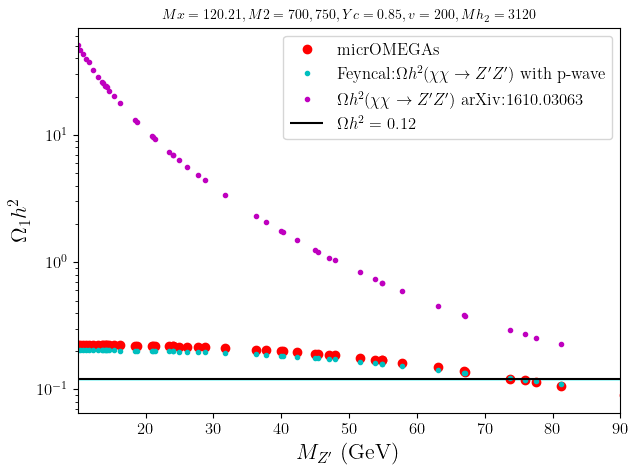

In [59]:
plt.figure(figsize=(7,5))

plt.semilogy(xd.MZp, (xd.Omega1+xd.Omega2),'ro',label='micrOMEGAs')
#plt.semilogy(xd.MZp, (xd.Omega1+xd.Omega2),'m-')
#plt.plot(xd.MZp, rd.RD_Sec/10000,'yo',label='Seclude WIMP/10000')
#plt.plot(xd.MZp, rd.RD_Ma/10000,'b.',label='Ma/10000')
plt.plot(xd.MZp, rd.RD_Fey/1,'c.',label=r'Feyncal:$\Omega h^2(\chi\chi\to Z^{\prime}Z^{\prime})$ with p-wave')

plt.plot(xd.MZp, rd.RD_ZZ,'m.',label=r'$\Omega h^2(\chi\chi\to Z^{\prime}Z^{\prime})$ arXiv:1610.03063')

#plt.plot(xd.MZp, rd.RD_sZ,'g.',label=r'$\Omega h^2(\chi\chi\to Z^{\prime}S)$ arXiv:1610.03063')

#plt.plot(xd.MZp, rd.RD_vv,'k.',label=r'$\Omega h^2(\chi\chi\to \nu\nu)$')

n=np.linspace(1e1,1.0e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='cyan',alpha=0.3,label='')

plt.hlines(Omega,0.1,1e2, 'k',label=r'$\Omega h^2=$ 0.12')

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\Omega_1 h^2$',size=16)
plt.title('$Mx=120.21, M2=700,750, Yc=0.85, v=200, Mh_2=3120$',size=10)
plt.legend()
#plt.grid()

#plt.ylim(0.11,0.2)
plt.xlim(xd.MZp.min(), 90)

#plt.savefig('plots/benchmark4.pdf')
plt.show()

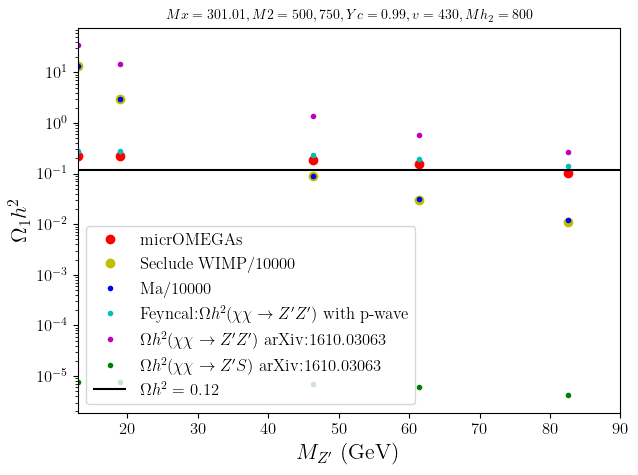

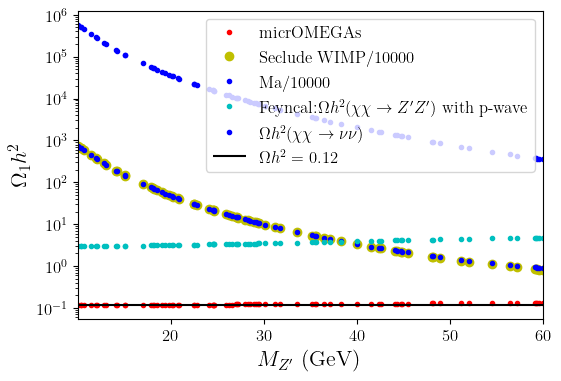

## $\langle \sigma vr\rangle$

In [55]:
v=0.12
cminvtoGeV=1.98E-14
secinvtoGeV=6.58E-25

#sv = a_coefficient(g1p, (MZp/m), m)+ b_coefficient(g1p, (MZp/m), m)*v**2
#print('sv(cm3/sec)=',sv,'sv(GeV-3)=',sv*(cmtoGeV**3/sectoGeV))

In [57]:
xd.mh2[0]

3120.208152801713

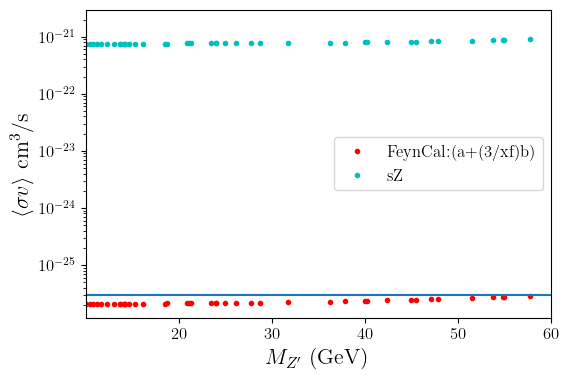

In [58]:
plt.figure(figsize=(6,4))

#(a+v**2*b)
plt.semilogy(xd.MZp, (rd.a_Fey+1*(3./25.)*rd.b_Fey)*tocm3sm1,'r.',label='FeynCal:(a+(3/xf)b)')

plt.semilogy(xd.MZp, (rd.a_sZ)*tocm3sm1,'c.',label='sZ')

plt.hlines(3e-26,10,90,)

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\langle \sigma v\rangle$ cm$^3$/s',size=16)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
plt.legend()
#plt.grid()

#plt.ylim(0.11,0.2)
plt.xlim(xd.MZp.min(), 60)

#plt.savefig('plots/benchmark4.pdf')
plt.show()

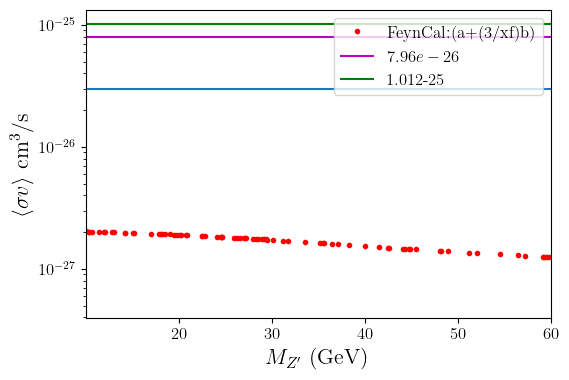

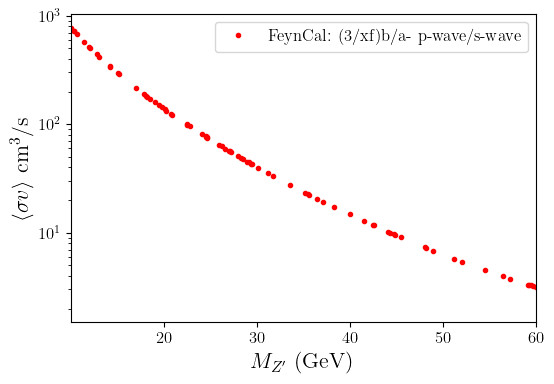

In [73]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, (3./25.)*rd.b_Fey/rd.a_Fey,'r.',label='FeynCal: (3/xf)b/a- p-wave/s-wave')

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\langle \sigma v\rangle$ cm$^3$/s',size=16)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
plt.legend()
#plt.grid()

#plt.ylim(0.11,0.2)
plt.xlim(xd.MZp.min(), 60)

#plt.savefig('plots/benchmark4.pdf')
plt.show()

thermal cross-section $\sigma v$ check for a bechmark point for 1DM model

In [46]:
so = subprocess.getoutput('cat SPheno.spc.MDEOlight')

In [47]:
so.splitlines()

['# SUSY Les Houches Accord 2 - MDEOlight Spectrum + Decays + Flavour Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.5  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.14.5  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop mass corrections to Higgs fields based on ',
 '#   M. D. 

In [48]:
MZp = eval(so.split('# VWm')[1].split()[1])
m = np.abs(eval(so.split('# Fv_3')[1].split()[1]))
print(MZp,m)

23.776911 86.0195399


In [49]:
subprocess.getoutput('cp SPheno.spc.MDEOlight SPheno.spc.MDEO1DM')
mo = subprocess.getoutput('~/Work/micromegas_5.0.6/MDEO1DM/./CalcOmega SPheno.spc.MDEO1DM')

mo.splitlines()

['',
 'Masses of odd sector Particles:',
 '~chi     : Mchi    =  86.020 || ',
 'Xf=2.60e+01 Omega h^2=1.20e-01',
 '',
 'vsigmaeff = 1.007e-25',
 '',
 '# Channels which contribute to 1/(omega) more than 1%.',
 '# Relative contributions in % are displayed',
 '  100% ~chi ~Chi ->Zp Zp ']

In [50]:
svmicro= eval(mo.split('vsigmaeff =')[1].split()[0])
print(svmicro)

1.007e-25


In [51]:
#subprocess.getoutput('~/Work/micromegas_6.0.3/MDEOlight/./CalcOmega SPheno.spc.MDEO')

'\nMasses of odd sector Particles:\n~chi     : Mchi    =  86.020 || ~~Xi1    : MXi1    = 500.000 || ~~Xi2    : MXi2    = 750.000 \n~~ETM    : METM    = 10000.000 || ~~ETI    : METI    = 10000.000 || ~~NS1    : MNS1    = 10000.000 \n~~NS2    : MNS2    = 100000.000 || \nOmega_1h^2=1.21E-01\nOmega_2h^2=2.04E-19\n'

In [53]:
print('a=',a_coefficient(g1p, (MZp/m), m),'b=',b_coefficient(g1p, (MZp/m), m))

a= 2.1415008773563774e-08 b= -2.0733068079708e-10


In [54]:
v=0.12
cmtoGeV=1.98E-14
sectoGeV=6.58E-25

sv = a_coefficient(g1p, (MZp/m), m)+ b_coefficient(g1p, (MZp/m), m)*v**2
print('sv(cm3/sec)=',sv,'sv(GeV-3)=',sv*(cmtoGeV**3/sectoGeV))

sv(cm3/sec)= 2.1412023211760296e-08 sv(GeV-3)= 2.5259653143280006e-25


In [55]:
sv*(cmtoGeV**3/sectoGeV)/svmicro

2.508406469044688

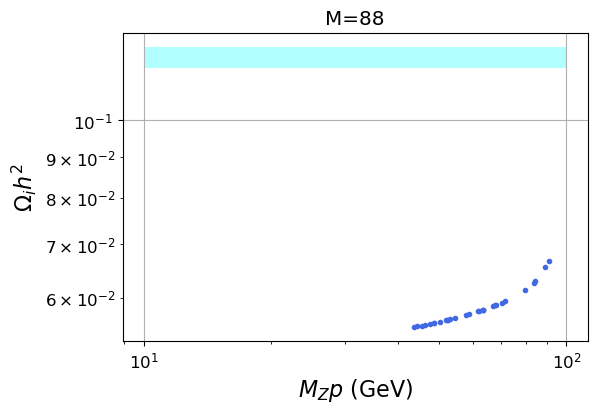

In [128]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, (xd.Omega1+xd.Omega2), color='royalblue', marker='.', ms=6, linestyle='',label='')
#plt.plot(xd.mh2, (xd.Omega1),color='red', marker='.',ms=1,linestyle='',label='')

n=np.linspace(1e1,1e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='cyan',alpha=0.3,label='')

plt.xlabel(r'$M_Zp$ (GeV)',size=16)
plt.ylabel(r'$\Omega_i h^2$',size=16)
plt.title('M=88')
#plt.legend()
plt.grid()

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(6e-2,0.13)
#plt.xlim(10, 125)
#plt.tight_layout()

plt.show()

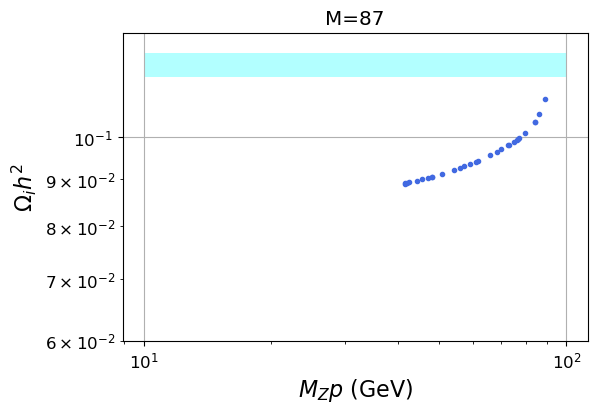

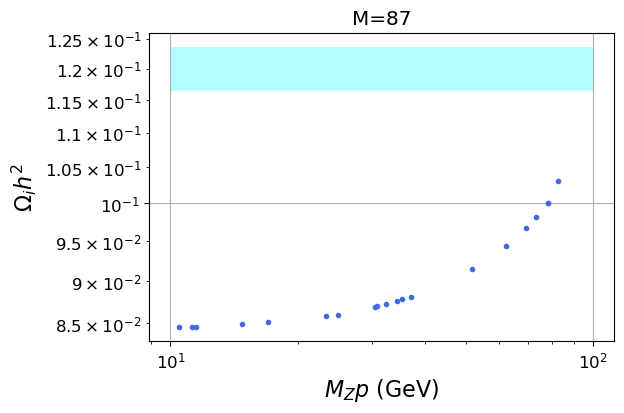

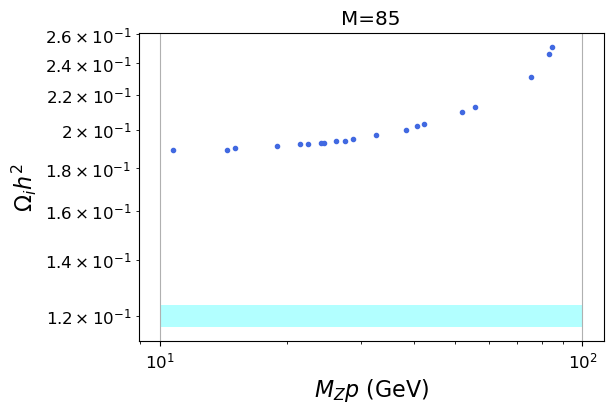

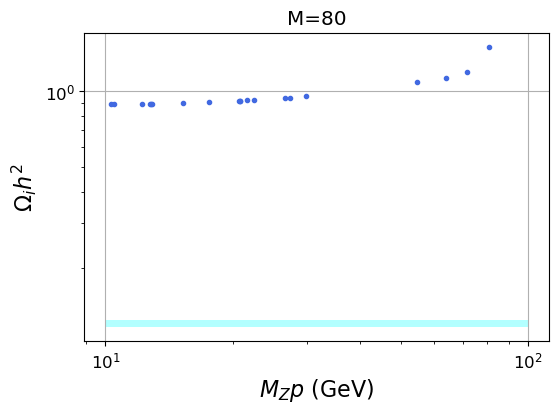

In [95]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, (xd.Omega1+xd.Omega2), color='royalblue', marker='.', ms=6, linestyle='',label='')
#plt.plot(xd.mh2, (xd.Omega1),color='red', marker='.',ms=1,linestyle='',label='')

n=np.linspace(1e1,1e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='cyan',alpha=0.3,label='')

plt.xlabel(r'$M_Zp$ (GeV)',size=16)
plt.ylabel(r'$\Omega_i h^2$',size=16)
plt.title('M=80')
#plt.legend()
plt.grid()

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(1e-3,0.13)
#plt.xlim(10, 125)
#plt.tight_layout()

plt.show()

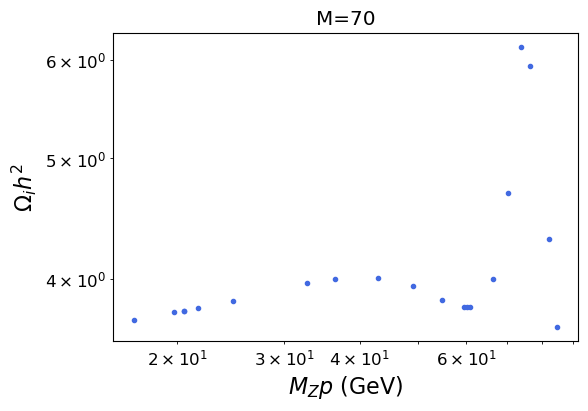